#                                   House Prices Task from Kaggle

In [64]:
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
import seaborn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import RandomizedLasso
from sklearn.decomposition import TruncatedSVD
from sklearn import model_selection 
from sklearn import metrics
from sklearn import linear_model
from sklearn import svm
from sklearn.ensemble import (GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor)
from sklearn.neural_network import MLPRegressor

## Read the data

In [65]:
data_train = pd.read_csv("train.csv", header =0, sep = ',', index_col='Id')
data_test = pd.read_csv("test.csv", header =0, sep = ',', index_col='Id')

In [66]:
data_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [67]:
data_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [68]:
print data_train.shape

(1460, 80)


In [69]:
print data_test.shape

(1459, 79)


#### Remove columns where the number of null values greater than 500

In [70]:
data_train_null = data_train.isnull().sum()
data_train_null

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [71]:
data_train_null[data_train_null>500]

Alley          1369
FireplaceQu     690
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

In [72]:
drop_columns = data_train_null[data_train_null>500]
data_train.drop(drop_columns.index, axis=1, inplace=True)
data_test.drop(drop_columns.index, axis=1, inplace=True)

In [73]:
print (data_train.shape)
print (data_test.shape)

(1460, 75)
(1459, 74)


## Data preprocessing

In [74]:
train_target = data_train['SalePrice'].copy()

In [75]:
train_target.count()

1460

In [76]:
data_train.drop('SalePrice', axis=1, inplace=True)

In [77]:
print (data_train.shape)

(1460, 74)


### Look at the distribution of sale prices in linear space and in log space

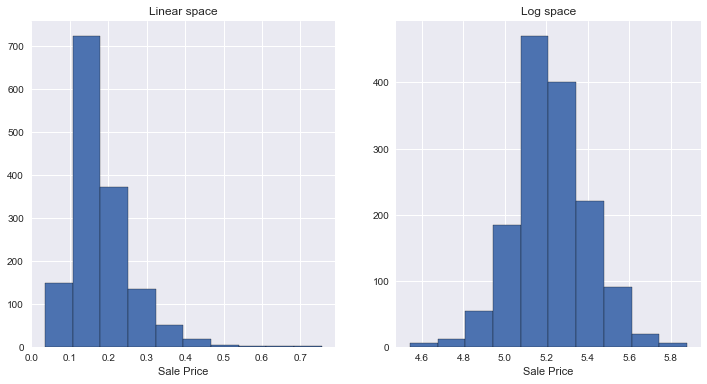

In [78]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.hist(train_target*(1e-6), 10, edgecolor = "k")
plt.xlabel("Sale Price")
plt.title("Linear space")

plt.subplot(1,2,2)
plt.hist(np.log10(train_target), 10, edgecolor = "k")
plt.xlabel("Sale Price")
plt.title("Log space")
plt.show()

### Transform the target to log space

In [79]:
train_target = np.log10(train_target)

In [80]:
train_target.head()

Id
1    5.319106
2    5.258877
3    5.349278
4    5.146128
5    5.397940
Name: SalePrice, dtype: float64

### Extract features from categorical data

In [81]:
all_data = data_train.append(data_test)
all_data = pd.get_dummies(all_data)

In [82]:
all_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [83]:
data_train = all_data.iloc[:1460,:].copy()

In [84]:
data_train[-5:]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1456,60,62.0,7917,6,5,1999,2000,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1457,20,85.0,13175,6,6,1978,1988,119.0,790.0,163.0,...,0,0,0,1,0,0,0,0,1,0
1458,70,66.0,9042,7,9,1941,2006,0.0,275.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1459,20,68.0,9717,5,6,1950,1996,0.0,49.0,1029.0,...,0,0,0,1,0,0,0,0,1,0
1460,20,75.0,9937,5,6,1965,1965,0.0,830.0,290.0,...,0,0,0,1,0,0,0,0,1,0


In [85]:
data_test = all_data.iloc[1460:,:].copy()

In [86]:
data_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,1,0,0,0,0,1,0
1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,0,1,0,0,0,0,1,0


### Fill empty values with the mean of the column

In [87]:
data_mean = data_train.mean() 

In [88]:
data_mean.shape

(270L,)

In [89]:
data_mean[:10]

MSSubClass         56.897260
LotFrontage        70.049958
LotArea         10516.828082
OverallQual         6.099315
OverallCond         5.575342
YearBuilt        1971.267808
YearRemodAdd     1984.865753
MasVnrArea        103.685262
BsmtFinSF1        443.639726
BsmtFinSF2         46.549315
dtype: float64

In [90]:
data_train = data_train.fillna(data_mean)
data_test = data_test.fillna(data_mean)

In [91]:
data_train[1229:1238]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1230,80,70.000000,7910,5,5,1960,1960,0.0,666.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1231,90,70.049958,18890,5,5,1977,1977,1.0,498.0,211.0,...,0,0,0,1,0,0,0,0,1,0
1232,90,70.000000,7728,5,6,1962,1962,120.0,803.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1233,90,70.000000,9842,4,5,1962,1962,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1234,20,70.049958,12160,5,5,1959,1959,180.0,1000.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1235,70,55.000000,8525,5,6,1911,1950,0.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1236,70,96.000000,13132,5,5,1914,1950,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1237,160,36.000000,2628,7,5,2003,2003,106.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1238,60,41.000000,12393,7,5,2004,2005,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [92]:
train_null = data_train.isnull().sum()
train_null[train_null>0]

Series([], dtype: int64)

In [93]:
test_null = data_test.isnull().sum()
test_null[test_null>0]

Series([], dtype: int64)

## Data scaling

In [94]:
(data_train+0.2)[1229:1235]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1230,80.2,70.200000,7910.2,5.2,5.2,1960.2,1960.2,0.2,666.2,0.2,...,0.2,0.2,0.2,1.2,0.2,0.2,0.2,0.2,1.2,0.2
1231,90.2,70.249958,18890.2,5.2,5.2,1977.2,1977.2,1.2,498.2,211.2,...,0.2,0.2,0.2,1.2,0.2,0.2,0.2,0.2,1.2,0.2
1232,90.2,70.200000,7728.2,5.2,6.2,1962.2,1962.2,120.2,803.2,0.2,...,0.2,0.2,0.2,1.2,0.2,0.2,0.2,0.2,1.2,0.2
1233,90.2,70.200000,9842.2,4.2,5.2,1962.2,1962.2,0.2,0.2,0.2,...,0.2,0.2,0.2,1.2,0.2,0.2,0.2,0.2,1.2,0.2
1234,20.2,70.249958,12160.2,5.2,5.2,1959.2,1959.2,180.2,1000.2,0.2,...,0.2,0.2,0.2,0.2,1.2,0.2,0.2,0.2,0.2,0.2
1235,70.2,55.200000,8525.2,5.2,6.2,1911.2,1950.2,0.2,0.2,0.2,...,0.2,0.2,0.2,1.2,1.2,0.2,0.2,0.2,0.2,0.2


In [95]:
data_train = np.log10(data_train+0.2)
data_test = np.log10(data_test+0.2)

In [96]:
#scaler = StandardScaler()
#scaler.fit(data_train, train_target)
#data_train.iloc[:,:] = scaler.transform(data_train)
#data_test.iloc[:,:] = scaler.transform(data_test)

In [97]:
data_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,1.779596,1.814248,3.926867,0.857332,0.716003,3.301724,3.301724,2.292699,2.848928,-0.69897,...,-0.69897,-0.69897,-0.69897,0.079181,-0.698970,-0.69897,-0.69897,-0.69897,0.079181,-0.69897
2,1.305351,1.904174,3.982280,0.792392,0.913814,3.295831,3.295831,-0.698970,2.990428,-0.69897,...,-0.69897,-0.69897,-0.69897,0.079181,-0.698970,-0.69897,-0.69897,-0.69897,0.079181,-0.69897
3,1.779596,1.833784,4.051160,0.857332,0.716003,3.301290,3.301507,2.210051,2.686815,-0.69897,...,-0.69897,-0.69897,-0.69897,0.079181,-0.698970,-0.69897,-0.69897,-0.69897,0.079181,-0.69897
4,1.846337,1.779596,3.980012,0.857332,0.716003,3.282214,3.294510,-0.698970,2.334856,-0.69897,...,-0.69897,-0.69897,-0.69897,0.079181,0.079181,-0.69897,-0.69897,-0.69897,-0.698970,-0.69897
5,1.779596,1.925312,4.154126,0.913814,0.716003,3.301073,3.301073,2.544316,2.816374,-0.69897,...,-0.69897,-0.69897,-0.69897,0.079181,-0.698970,-0.69897,-0.69897,-0.69897,0.079181,-0.69897


In [98]:
data_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1461,1.305351,1.904174,4.065288,0.716003,0.792392,3.292522,3.292522,-0.698970,2.670431,2.158965,...,-0.69897,-0.69897,-0.69897,0.079181,-0.69897,-0.69897,-0.69897,-0.69897,0.079181,-0.69897
1462,1.305351,1.909556,4.154339,0.792392,0.792392,3.291857,3.291857,2.034227,2.965296,-0.698970,...,-0.69897,-0.69897,-0.69897,0.079181,-0.69897,-0.69897,-0.69897,-0.69897,0.079181,-0.69897
1463,1.779596,1.870404,4.140828,0.716003,0.716003,3.300422,3.300639,-0.698970,2.898286,-0.698970,...,-0.69897,-0.69897,-0.69897,0.079181,-0.69897,-0.69897,-0.69897,-0.69897,0.079181,-0.69897
1464,1.779596,1.893207,3.999052,0.792392,0.792392,3.300639,3.300639,1.305351,2.779741,-0.698970,...,-0.69897,-0.69897,-0.69897,0.079181,-0.69897,-0.69897,-0.69897,-0.69897,0.079181,-0.69897
1465,2.079904,1.635484,3.699421,0.913814,0.716003,3.299333,3.299333,-0.698970,2.420286,-0.698970,...,-0.69897,-0.69897,-0.69897,0.079181,-0.69897,-0.69897,-0.69897,-0.69897,0.079181,-0.69897


## Feature selection

####  -   using PCA

In [99]:
pca = TruncatedSVD(n_components=50)
data_train_PCA = pca.fit_transform(data_train)
data_test_PCA = pca.transform(data_test)

In [100]:
data_train_PCA.shape

(1460L, 50L)

In [101]:
data_test_PCA.shape

(1459L, 50L)

#### - using Stability Selection

In [102]:
rlr = RandomizedLasso(alpha=0.0006)
rlr.fit(data_train, train_target)
np.sum(rlr.scores_>0)

57

In [103]:
data_train_lasso = data_train.loc[:, rlr.scores_>0]
data_test_lasso = data_test.loc[:, rlr.scores_>0]

In [104]:
data_train_lasso.shape

(1460, 57)

In [105]:
data_test_lasso.shape

(1459, 57)

## Training ML Models

In [106]:
def testing_models(train,labels):
    results={}
    def test_model(regr_model):
        
        cv = model_selection.KFold(n_splits=5,shuffle=True,random_state=65) 
        scores = np.sqrt(-model_selection.cross_val_score(regr_model, train, labels, scoring="neg_mean_squared_error", cv=cv))
        score = [scores.mean(), scores.std()]
        return score
 
    regr_model = linear_model.Ridge()
    results["Ridge"]=test_model(regr_model)
   
    regr_model = linear_model.Lasso(alpha=1e-4)
    results["Lasso"]=test_model(regr_model)
    
    regr_model = RandomForestRegressor(n_estimators=50, random_state=10)
    results["Random Forest"]=test_model(regr_model)
    
    regr_model = GradientBoostingRegressor(random_state=10)
    results["Gradient Boosting"]=test_model(regr_model)
    
    regr_model = AdaBoostRegressor(random_state = 10, learning_rate=0.02)
    results["AdaBoost"]=test_model(regr_model)
    
    regr_model = svm.SVR()
    results["SVM RBF"]=test_model(regr_model)
    
    regr_model = svm.SVR(kernel="linear")
    results["SVM Linear"]=test_model(regr_model)
    
    results = pd.DataFrame.from_dict(results, orient='index')
    results.columns=["Mean Score", "Score std"]
    results=results.sort_values(by=["Mean Score"], ascending=False)
    
    return results

In [107]:
def plot_graph(results, tit_string):
    plt.figure(figsize=(12,6))
    plt.rcParams.update({'font.size': 28})
    results.plot(kind="bar", title="Models Scores (using " + tit_string)
    plt.xlabel("Models")
    plt.ylabel("RMSE")
    plt.ylim
    
    return plt.show()

### Results of models that used all features

In [108]:
results = testing_models(data_train, train_target)
results

,Mean Score,Score std
AdaBoost,0.087364,0.002523
SVM Linear,0.076102,0.005241
SVM RBF,0.071052,0.005086
Random Forest,0.062596,0.004538
Gradient Boosting,0.057892,0.006758
Ridge,0.055889,0.009292
Lasso,0.053519,0.008986


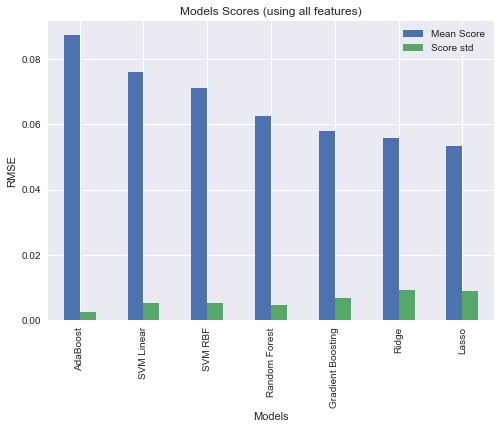

In [109]:
plot_graph(results, "all features)")

### Results of models that used PCA selected features

In [110]:
results = testing_models(data_train_PCA, train_target)
results

,Mean Score,Score std
AdaBoost,0.101078,0.005163
Random Forest,0.083478,0.004111
Gradient Boosting,0.078992,0.005490
SVM RBF,0.078301,0.004732
SVM Linear,0.071491,0.007609
Ridge,0.068282,0.006999
Lasso,0.068089,0.007059


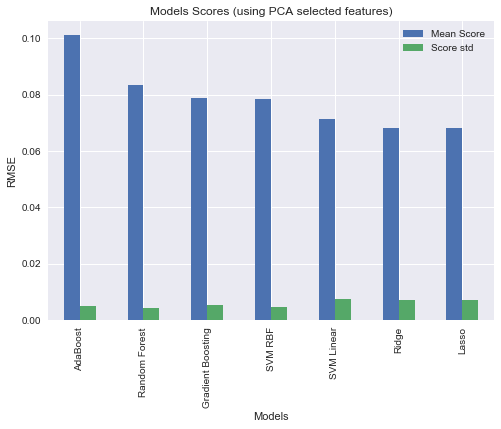

In [111]:
plot_graph(results, "PCA selected features)")

### Results of models that used stability selected features

In [112]:
results = testing_models(data_train_lasso, train_target)
results

,Mean Score,Score std
AdaBoost,0.087441,0.002735
SVM RBF,0.068760,0.007170
SVM Linear,0.063306,0.011389
Random Forest,0.062046,0.004886
Gradient Boosting,0.058264,0.007613
Ridge,0.057309,0.010217
Lasso,0.057062,0.010241


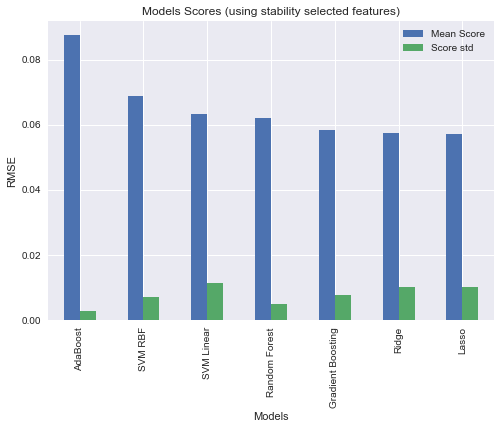

In [113]:
plot_graph(results, "stability selected features)")

## Searching the best model

#### For final results it was taken Lasso model that used all features

#### Best parameters selection

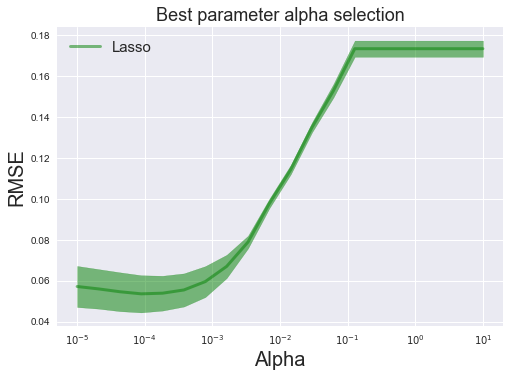

******************************************************************************************

                With using alpha=0.00009 best score in Lasso model: 0.0536                

******************************************************************************************


In [114]:
cv = model_selection.KFold(n_splits=5,shuffle=True,random_state=65)

alphas = np.logspace(-5,1,20)
all_scores = np.zeros((len(alphas),5), dtype=np.float)
scores_mean = np.zeros(len(alphas))
scores_std = np.zeros(len(alphas))

for i in range(0,len(alphas)):
    model = linear_model.Lasso(alpha=alphas[i], max_iter=1500)
    all_scores[i,:] = np.sqrt(-model_selection.cross_val_score(model, data_train, train_target,scoring="neg_mean_squared_error", cv = cv))
    scores_mean[i] = all_scores[i,:].mean()
    scores_std[i] = all_scores[i,:].std()

plt.plot(alphas,scores_mean,'g-',lw=3, alpha=0.5, label="Lasso")
plt.fill_between(alphas,np.array(scores_mean)-np.array(scores_std),
             np.array(scores_mean)+np.array(scores_std),color="g",alpha=0.5)

plt.xscale("log")
plt.xlabel("Alpha", size=20)
plt.ylabel("RMSE", size=20)
plt.title("Best parameter alpha selection", fontsize=18)
plt.legend(loc=2, fontsize=15)
plt.show()

score_min = min(scores_mean)
min_index = np.argmin(scores_mean)
print ("*"*90)
print
print ("{:^90}".format("With using alpha={:.5f} best score in Lasso model: {:.4f}".format(alphas[min_index], score_min)))
print
print ("*"*90)

#### Model performance depending on the number of training sample objects

In [115]:
best_model = linear_model.Lasso(alpha=0.00009)

In [116]:
train_sizes, train_scores, test_scores = model_selection.learning_curve(best_model,
                                           data_train, train_target, 
                                           train_sizes=np.arange(0.1, 1., 0.1),
                                           cv=5, scoring='neg_mean_squared_error')
train_scores = np.sqrt(-train_scores)
test_scores = np.sqrt(-test_scores)
print (train_sizes, train_scores.mean(axis=1), test_scores.mean(axis=1))

(array([ 116,  233,  350,  467,  584,  700,  817,  934, 1051]), array([ 0.01405079,  0.02439431,  0.03079004,  0.03536071,  0.03782121,
        0.04001943,  0.0410491 ,  0.04184108,  0.04276087]), array([ 0.08171909,  0.06925453,  0.0614652 ,  0.05932587,  0.05828424,
        0.05729579,  0.05653338,  0.05575573,  0.05511643]))


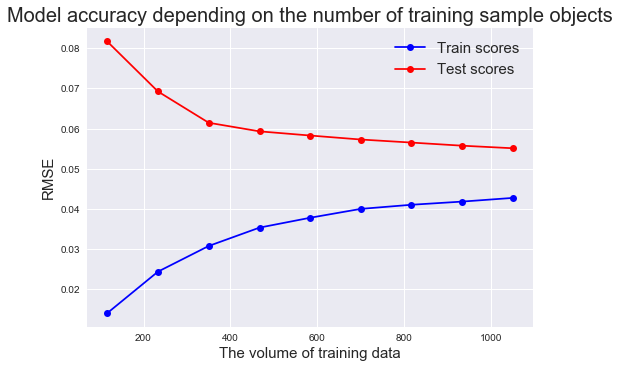

In [117]:
plt.grid(True)
plt.plot(train_sizes, train_scores.mean(axis=1), 'b-', marker='o', label='Train scores')
plt.plot(train_sizes, test_scores.mean(axis=1), 'r-', marker='o', label='Test scores')
plt.xlabel("The volume of training data", fontsize=15)
plt.ylabel("RMSE", fontsize=15)
plt.title("Model accuracy depending on the number of training sample objects", fontsize=20)
plt.legend(loc='best', fontsize=15)
plt.show()

## Save predictions

In [118]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(data_train,
                                                                     train_target, 
                                                                     test_size=0.3, random_state=25)

In [119]:
best_model.fit(X_train, Y_train)

Lasso(alpha=9e-05, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [120]:
sct = metrics.mean_squared_error(Y_test, best_model.predict(X_test))
print(np.sqrt(sct))

0.0523095113102


In [121]:
preds = best_model.predict(data_test)

In [122]:
preds[:20]

array([ 5.06364682,  5.20724056,  5.25978274,  5.29208213,  5.32273957,
        5.22308664,  5.23386443,  5.19957034,  5.29356594,  5.08149857,
        5.23968558,  5.0032097 ,  4.99142869,  5.15931734,  5.01685873,
        5.55584762,  5.3911159 ,  5.47535161,  5.4791621 ,  5.68850729])

In [123]:
#back from log space to linear space
predictions = 10**preds

In [124]:
predictions[:20]

array([ 115783.53946499,  161153.80513015,  181879.0755537 ,
        195921.51494649,  210251.72556215,  167142.40118546,
        171342.23517925,  158332.59694381,  196592.04494442,
        120642.01202629,  173654.31657044,  100741.7980328 ,
         98045.73131713,  144316.95074568,  103958.19521047,
        359623.13536081,  246102.4285971 ,  298780.05859049,
        301413.08498064,  488098.29117206])

In [125]:
solution = pd.DataFrame({"Id":data_test.index, "SalePrice":predictions})
solution.to_csv("House_Price_Task.csv", index = False)